## Sentiment Analysis of Amazon Fine Food Reviews using Logistic Regression (L2)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

import random
from scipy.stats import uniform

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
con = sqlite3.connect('database.sqlite')

In [3]:
filtered_data=pd.read_sql_query("""Select * FROM Reviews WHERE Score !=3 LIMIT 5000 """,con)

In [4]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
def partition(x):
    if x<3:
        return 0
    return 1
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition)
filtered_data['Score'] = positiveNegative

In [6]:
type(positiveNegative)

pandas.core.series.Series

In [7]:
positiveNegative.head()

0    1
1    0
2    1
3    0
4    1
Name: Score, dtype: int64

In [8]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
print("Number of data points in our data", filtered_data.shape)

Number of data points in our data (5000, 10)


In [10]:
sorted_data=filtered_data.sort_values('ProductId',axis=0,ascending=True,kind='quicksort', na_position='last')

In [11]:
type(sorted_data)

pandas.core.frame.DataFrame

In [12]:
sorted_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...
2547,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...
1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...
1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,1,961718400,Great Product,This was a really good idea and the final prod...
2942,3204,B000084DVR,A1UGDJP1ZJWVPF,"T. Moore ""thoughtful reader""",1,1,1,1177977600,Good stuff!,I'm glad my 45lb cocker/standard poodle puppy ...


In [13]:
len(sorted_data)

5000

In [14]:
final = sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace = False)

In [15]:
len(final)

4986

In [16]:
# 14 duplicate enteries have been deleted.

In [17]:
display = pd.read_sql_query("""Select * From Reviews Where Score!=3 and HelpfulnessNumerator > HelpfulnessDenominator""",con)

In [18]:
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
1,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [19]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [20]:
print(final.shape)

(4986, 10)


In [21]:
final.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...


In [22]:
final["Score"].value_counts()

1    4178
0     808
Name: Score, dtype: int64

In [23]:
sent_0 = final['Text'].values[0]
print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [24]:
#Removing html tags

In [25]:
import re
sent_0 = re.sub(r"http\S+", "", sent_0)

In [26]:
print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br /> /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [27]:
from bs4 import BeautifulSoup

In [28]:
# Data parsing is a process when one data format is transformed into another, more readable data format.

In [29]:
soup = BeautifulSoup(sent_0, 'lxml')

In [30]:
print(soup)

<html><body><p>Why is this $[...] when the same product is available for $[...] here?<br/> /&gt;<br/>The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.</p></body></html>


In [31]:
text = soup.get_text()
print(text)

Why is this $[...] when the same product is available for $[...] here? />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [32]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [33]:
sent_1500 = final['Text'].values[1500]
print(final['Text'].values[1500])

Wow.  So far, two two-star reviews.  One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I'm sorry; but these reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you don't like that combination, don't order this type of cookie.  I find the combo quite nice, really.  The oatmeal sort of "calms" the rich chocolate flavor and gives the cookie sort of a coconut-type consistency.  Now let's also remember that tastes differ; so, I've given my opinion.<br /><br />Then, these are soft, chewy cookies -- as advertised.  They are not "crispy" cookies, or the blurb would say "crispy," rather than "chewy."  I happen to like raw cookie dough; however, I don't see where these taste like raw cookie dough.  Both are soft, however, so is this the confusion?  And, yes, they stick together.  Soft cookies tend to do that.  They aren't individually wrapped, which would add to the cost.  Oh yeah, cho

In [34]:
sent_1500 = decontracted(sent_1500)

In [35]:
print(sent_1500)

Wow.  So far, two two-star reviews.  One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I am sorry; but these reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you do not like that combination, do not order this type of cookie.  I find the combo quite nice, really.  The oatmeal sort of "calms" the rich chocolate flavor and gives the cookie sort of a coconut-type consistency.  Now let is also remember that tastes differ; so, I have given my opinion.<br /><br />Then, these are soft, chewy cookies -- as advertised.  They are not "crispy" cookies, or the blurb would say "crispy," rather than "chewy."  I happen to like raw cookie dough; however, I do not see where these taste like raw cookie dough.  Both are soft, however, so is this the confusion?  And, yes, they stick together.  Soft cookies tend to do that.  They are not individually wrapped, which would add to the cost.  Oh y

In [36]:
#remove words with numbers python

In [37]:
print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br /> /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [38]:
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br /> /><br />The Victor  and  traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [39]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [40]:
from tqdm import tqdm

preprocessed_reviews = []
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())
    

100%|████████████████████████████████████████████████████████████████████████████| 4986/4986 [00:03<00:00, 1353.42it/s]


In [41]:
preprocessed_reviews[1500]

'wow far two two star reviews one obviously no idea ordering wants crispy cookies hey sorry reviews nobody good beyond reminding us look ordering chocolate oatmeal cookies not like combination not order type cookie find combo quite nice really oatmeal sort calms rich chocolate flavor gives cookie sort coconut type consistency let also remember tastes differ given opinion soft chewy cookies advertised not crispy cookies blurb would say crispy rather chewy happen like raw cookie dough however not see taste like raw cookie dough soft however confusion yes stick together soft cookies tend not individually wrapped would add cost oh yeah chocolate chip cookies tend somewhat sweet want something hard crisp suggest nabiso ginger snaps want cookie soft chewy tastes like combination chocolate oatmeal give try place second order'

In [42]:
len(preprocessed_reviews)

4986

In [43]:
type(preprocessed_reviews)

list

In [44]:
filtered_data.shape

(5000, 10)

In [45]:
# Adding preprocessed text to the original dataframe

In [46]:
final['preprocessed reviews'] = preprocessed_reviews

In [47]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed reviews
2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...,product available victor traps unreal course t...
2547,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...,used victor fly bait seasons ca not beat great...
1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,received shipment could hardly wait try produc...
1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,1,961718400,Great Product,This was a really good idea and the final prod...,really good idea final product outstanding use...
2942,3204,B000084DVR,A1UGDJP1ZJWVPF,"T. Moore ""thoughtful reader""",1,1,1,1177977600,Good stuff!,I'm glad my 45lb cocker/standard poodle puppy ...,glad cocker standard poodle puppy loves stuff ...


In [48]:
# Applying Train test split

In [49]:
X = final['preprocessed reviews']
Y = final['Score']

In [50]:
print(X.shape,Y.shape)

(4986,) (4986,)


In [51]:
# Splitting the Data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [54]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(3490,) (1496,) (3490,) (1496,)


### Bag of Words (Unigrams)

In [153]:
from sklearn.feature_extraction.text import CountVectorizer

In [154]:
bow = CountVectorizer() # ngram_range=(1,1) --> unigram

In [155]:
x_train_uni = bow.fit_transform(X_train)
x_test_uni = bow.transform(X_test)

In [156]:
# Data Standardization

# StandardScaler : (mean = 0 & SD = 1) It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution. It is more useful in classification than regression
# Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.
# Normalizer : It squeezes the data between 0 and 1. It performs normalization

# In other words Normalizer acts row-wise and StandardScaler column-wise. Normalizer does not remove the mean and scale by deviation but scales the whole row to unit norm.

In [157]:
from sklearn.preprocessing import StandardScaler
x_train_uni = StandardScaler(with_mean= False).fit_transform(x_train_uni)
x_test_uni = StandardScaler(with_mean= False).fit_transform(x_test_uni)

### Hyperparameter tuning using Grid Search CV to find the optimal C for Logistic Regression

In [158]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [159]:
LR = LogisticRegression(penalty ='l2',solver='liblinear')
C_values = [{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
gsv = GridSearchCV(LR,C_values,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
# verbose = Controls the verbosity: the higher, the more messages.
# scoring = 'f1_weighted' = F1 score Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
# n_jobs = -1 = Number of jobs to run in parallel, -1 means using all processors.

gsv.fit(x_train_uni,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_C=gsv.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.7s finished


Best HyperParameter:  {'C': 1}
0.8627729500306431


In [160]:
result = gsv.cv_results_

In [161]:
print(result)

{'mean_fit_time': array([0.05880194, 0.16800413, 0.28125243, 0.38376942, 0.42476892]), 'std_fit_time': array([0.02334545, 0.0265454 , 0.03875816, 0.05199938, 0.06208113]), 'mean_score_time': array([0.00399733, 0.00400071, 0.00513587, 0.00964999, 0.00659814]), 'std_score_time': array([0.00089448, 0.0006331 , 0.00542824, 0.0119656 , 0.00546314]), 'param_C': masked_array(data=[0.0001, 0.01, 1, 100, 10000],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.0001}, {'C': 0.01}, {'C': 1}, {'C': 100}, {'C': 10000}], 'split0_test_score': array([0.77920171, 0.85222547, 0.86062011, 0.8490599 , 0.83076506]), 'split1_test_score': array([0.78254251, 0.87253526, 0.88430481, 0.84930196, 0.83381089]), 'split2_test_score': array([0.78254251, 0.84400769, 0.84874184, 0.84573974, 0.84097533]), 'split3_test_score': array([0.7703503 , 0.8562269 , 0.86667872, 0.85092419, 0.8510522 ]), 'split4_test_score': array([0.79342374, 0.84448238, 

In [162]:
print(type(result))

<class 'dict'>


In [163]:
df = pd.DataFrame(result)

In [164]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058802,0.023345,0.003997,0.000894,0.0001,{'C': 0.0001},0.779202,0.782543,0.782543,0.770350,0.793424,0.781612,0.007401,5
1,0.168004,0.026545,0.004001,0.000633,0.01,{'C': 0.01},0.852225,0.872535,0.844008,0.856227,0.844482,0.853896,0.010412,2
2,0.281252,0.038758,0.005136,0.005428,1,{'C': 1},0.860620,0.884305,0.848742,0.866679,0.853519,0.862773,0.012378,1
3,0.383769,0.051999,0.009650,0.011966,100,{'C': 100},0.849060,0.849302,0.845740,0.850924,0.849102,0.848826,0.001690,3
4,0.424769,0.062081,0.006598,0.005463,10000,{'C': 10000},0.830765,0.833811,0.840975,0.851052,0.838640,0.839049,0.006986,4


In [165]:
print(gsv.best_params_)

{'C': 1}


In [166]:
print(gsv.n_splits_)

5


In [167]:
# Plotting graph for different hyperparameter value combinations and the f1_weighted score computed by 5 fold CV

In [168]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058802,0.023345,0.003997,0.000894,0.0001,{'C': 0.0001},0.779202,0.782543,0.782543,0.770350,0.793424,0.781612,0.007401,5
1,0.168004,0.026545,0.004001,0.000633,0.01,{'C': 0.01},0.852225,0.872535,0.844008,0.856227,0.844482,0.853896,0.010412,2
2,0.281252,0.038758,0.005136,0.005428,1,{'C': 1},0.860620,0.884305,0.848742,0.866679,0.853519,0.862773,0.012378,1
3,0.383769,0.051999,0.009650,0.011966,100,{'C': 100},0.849060,0.849302,0.845740,0.850924,0.849102,0.848826,0.001690,3
4,0.424769,0.062081,0.006598,0.005463,10000,{'C': 10000},0.830765,0.833811,0.840975,0.851052,0.838640,0.839049,0.006986,4


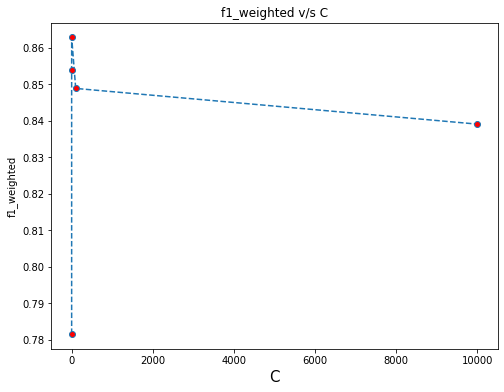

In [169]:
plt.figure(figsize=(8,6))
plt.xlabel("C",fontsize=15)
plt.ylabel("f1_weighted")
plt.title('f1_weighted v/s C')
plt.plot(df['param_C'],df['mean_test_score'],linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.show()

### Finding the accuracy in Test data using calculated optimal C

In [170]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [171]:
LR = LogisticRegression(penalty='l2',C=1,solver='liblinear')
LR.fit(x_train_uni,Y_train)
y_pred = LR.predict(x_test_uni)

### Plotting Heatmap

In [172]:
cnf = confusion_matrix(Y_test, y_pred)

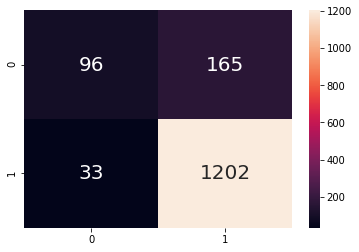

In [173]:
sns.heatmap(cnf,annot=True,fmt='d',annot_kws={'size':20})
# fmt : String formatting code to use when adding annotations. d--> decimal, s-->string
# annot: If True, write the data value in each cell. 

In [174]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))

Accuracy on test set: 86.765%
Precision on test set: 0.812
Recall on test set: 0.671
F1-Score on test set: 0.708


In [175]:
type(Y_test)

pandas.core.series.Series

In [176]:
type(y_pred)

numpy.ndarray

### Hyperparameter tuning using Random Search CV to find the optimal C for Logistic Regression

In [178]:
LR = LogisticRegression()
C_value = {'C':uniform()}
rsv = RandomizedSearchCV(LR, param_distributions = C_value , cv=5,verbose=1, scoring='f1_micro', n_jobs=-1)

rsv.fit(x_train_uni,Y_train)

print("Best HyperParameter: ",rsv.best_params_)
print(rsv.best_score_)
optimal_C=rsv.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.2s finished


Best HyperParameter:  {'C': 0.7432751578543351}
0.8793696275071634


In [179]:
print(optimal_C)

0.8793696275071634


In [180]:
result = rsv.cv_results_

In [181]:
df = pd.DataFrame(result)

In [182]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.467644,0.045319,0.003399,0.000486,0.16009,{'C': 0.1600899855093948},0.875358,0.882521,0.869628,0.885387,0.872493,0.877077,0.005969,10
1,0.407401,0.037414,0.002399,0.002058,0.458123,{'C': 0.45812345228530416},0.876791,0.886819,0.868195,0.886819,0.876791,0.879083,0.007054,6
2,0.363642,0.022899,0.001801,0.001471,0.326917,{'C': 0.3269172563690548},0.876791,0.885387,0.869628,0.886819,0.876791,0.879083,0.006317,6
3,0.419606,0.015623,0.003399,0.000490,0.743275,{'C': 0.7432751578543351},0.876791,0.886819,0.863897,0.889685,0.879656,0.879370,0.009034,1
4,0.405872,0.042294,0.002800,0.002315,0.900453,{'C': 0.9004532291965287},0.875358,0.891117,0.863897,0.886819,0.879656,0.879370,0.009477,1
5,0.384287,0.024385,0.005721,0.005308,0.63561,{'C': 0.6356098240787952},0.878223,0.885387,0.863897,0.888252,0.878223,0.878797,0.008432,8
6,0.378572,0.026346,0.002399,0.002060,0.265916,{'C': 0.2659162805040176},0.876791,0.886819,0.869628,0.886819,0.876791,0.879370,0.006621,5
7,0.353008,0.041226,0.004631,0.005558,0.972701,{'C': 0.9727011587647876},0.875358,0.891117,0.863897,0.886819,0.879656,0.879370,0.009477,1
8,0.447005,0.029414,0.004196,0.000399,0.937093,{'C': 0.9370934949094095},0.875358,0.891117,0.863897,0.886819,0.879656,0.879370,0.009477,1
9,0.335097,0.038524,0.003922,0.006046,0.171475,{'C': 0.1714749848087842},0.876791,0.882521,0.869628,0.885387,0.872493,0.877364,0.005914,9


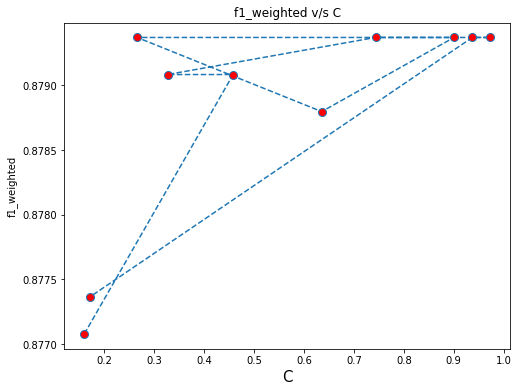

In [183]:
plt.figure(figsize=(8,6))
plt.xlabel("C",fontsize=15)
plt.ylabel("f1_weighted")
plt.title('f1_weighted v/s C')
plt.plot(df['param_C'],df['mean_test_score'],linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.show()

### Finding the accuracy in Test data using calculated optimal C

In [184]:
LR = LogisticRegression(penalty='l2',C=0.41888926425184225,solver='liblinear')
LR.fit(x_train_uni,Y_train)
y_pred = LR.predict(x_test_uni)

In [185]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))

Accuracy on test set: 86.965%
Precision on test set: 0.824
Recall on test set: 0.669
F1-Score on test set: 0.708


In [186]:
# Plotting Heatmap

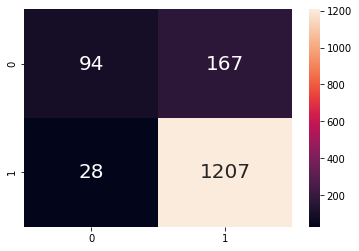

In [187]:
cnf = confusion_matrix(Y_test, y_pred)
sns.heatmap(cnf,annot=True,fmt='d',annot_kws={'size':20})

## Bi-Grams

In [188]:
bi_gram = CountVectorizer(ngram_range=(1,2))
x_tr_bi = bi_gram.fit_transform(X_train)
x_test_bi = bi_gram.transform(X_test)

x_tr_bi = StandardScaler(with_mean = False).fit_transform(x_tr_bi)
x_test_bi = StandardScaler(with_mean = False).fit_transform(x_test_bi)

### Hyperparameter tuning using Grid Search CV to find the optimal C for Logistic Regression

In [190]:
LR = LogisticRegression(penalty ='l2',solver='liblinear')
C_values = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
gsv = GridSearchCV(LR,C_values,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
# verbose = Controls the verbosity: the higher, the more messages.
# scoring = 'f1_weighted' = F1 score Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
# n_jobs = -1 = Number of jobs to run in parallel, -1 means using all processors.

gsv.fit(x_tr_bi,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_C=gsv.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   13.5s finished


Best HyperParameter:  {'C': 0.01}
0.7817237490010351


In [191]:
gsv.cv_results_

{'mean_fit_time': array([0.4709363 , 1.20448165, 1.9990684 , 3.64737535, 2.82332711]),
 'std_fit_time': array([0.02280287, 0.04043118, 0.12743581, 0.59225248, 0.77443612]),
 'mean_score_time': array([0.0053977 , 0.00779963, 0.00812607, 0.00625119, 0.00932899]),
 'std_score_time': array([0.00135591, 0.007647  , 0.00387282, 0.00765612, 0.00555694]),
 'param_C': masked_array(data=[0.0001, 0.01, 1, 100, 10000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.0001}, {'C': 0.01}, {'C': 1}, {'C': 100}, {'C': 10000}],
 'split0_test_score': array([0.77920171, 0.78254251, 0.77843954, 0.75519001, 0.75519001]),
 'split1_test_score': array([0.77581205, 0.78583579, 0.77581205, 0.74776835, 0.7437522 ]),
 'split2_test_score': array([0.77920171, 0.77920171, 0.77581205, 0.77581205, 0.77581205]),
 'split3_test_score': array([0.77717855, 0.78051936, 0.77717855, 0.76505372, 0.7592085 ]),
 'split4_test_score': array([0.77378931,

In [192]:
df = pd.DataFrame(gsv.cv_results_)

In [193]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.470936,0.022803,0.005398,0.001356,0.0001,{'C': 0.0001},0.779202,0.775812,0.779202,0.777179,0.773789,0.777037,0.002071,2
1,1.204482,0.040431,0.007800,0.007647,0.01,{'C': 0.01},0.782543,0.785836,0.779202,0.780519,0.780519,0.781724,0.002317,1
2,1.999068,0.127436,0.008126,0.003873,1,{'C': 1},0.778440,0.775812,0.775812,0.777179,0.773789,0.776206,0.001555,3
3,3.647375,0.592252,0.006251,0.007656,100,{'C': 100},0.755190,0.747768,0.775812,0.765054,0.775574,0.763880,0.011096,4
4,2.823327,0.774436,0.009329,0.005557,10000,{'C': 10000},0.755190,0.743752,0.775812,0.759208,0.772948,0.761382,0.011797,5


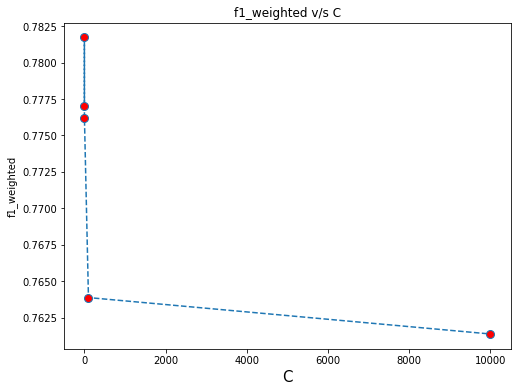

In [194]:
plt.figure(figsize=(8,6))
plt.xlabel("C",fontsize=15)
plt.ylabel("f1_weighted")
plt.title('f1_weighted v/s C')
plt.plot(df['param_C'],df['mean_test_score'],linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.show()

### Finding the accuracy in Test data using optimal C


In [195]:
LR = LogisticRegression(penalty='l2',C=0.01,solver='liblinear')
LR.fit(x_train_uni,Y_train)
y_pred = LR.predict(x_test_uni)

In [196]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))

Accuracy on test set: 86.765%
Precision on test set: 0.861
Recall on test set: 0.640
F1-Score on test set: 0.680


In [197]:
# Plotting Heatmap

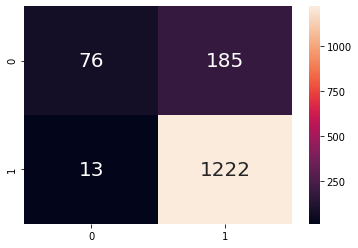

In [198]:
cnf = confusion_matrix(Y_test, y_pred)
sns.heatmap(cnf,annot=True,fmt='d',annot_kws={'size':20})

### Hyperparameter tuning using Random Search CV to find the optimal C for Logistic Regression

In [200]:
LR = LogisticRegression(penalty ='l2',solver='liblinear')
C_values = {'C': uniform()} 
gsv = RandomizedSearchCV(LR,C_values,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
# verbose = Controls the verbosity: the higher, the more messages.
# scoring = 'f1_weighted' = F1 score Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
# n_jobs = -1 = Number of jobs to run in parallel, -1 means using all processors.

gsv.fit(x_tr_bi,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_C=gsv.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.8s finished


Best HyperParameter:  {'C': 0.8670592220438696}
0.7762063004479631


In [201]:
result = gsv.cv_results_
df = pd.DataFrame(result)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.968582,0.071331,0.007249,0.007074,0.782762,{'C': 0.7827624307149678},0.77844,0.772372,0.775812,0.777179,0.773789,0.775518,0.002203,5
1,1.808633,0.082203,0.009215,0.004011,0.454048,{'C': 0.45404806235827333},0.77844,0.772372,0.775812,0.777179,0.770350,0.774831,0.003021,6
2,2.045873,0.175473,0.005605,0.001018,0.867059,{'C': 0.8670592220438696},0.77844,0.775812,0.775812,0.777179,0.773789,0.776206,0.001555,1
3,1.850205,0.063165,0.000215,0.000430,0.67018,{'C': 0.6701804197759299},0.77844,0.772372,0.775812,0.777179,0.770350,0.774831,0.003021,6
4,1.899997,0.109422,0.006252,0.007657,0.98354,{'C': 0.9835404772074736},0.77844,0.775812,0.775812,0.777179,0.773789,0.776206,0.001555,1
5,1.846587,0.055376,0.006248,0.007653,0.732995,{'C': 0.7329954210626083},0.77844,0.772372,0.775812,0.777179,0.770350,0.774831,0.003021,6
6,1.863615,0.042575,0.003124,0.006248,0.633665,{'C': 0.6336651018874644},0.77844,0.772372,0.775812,0.777179,0.770350,0.774831,0.003021,6
7,2.089713,0.128666,0.004200,0.002135,0.915614,{'C': 0.915614127564562},0.77844,0.775812,0.775812,0.777179,0.773789,0.776206,0.001555,1
8,2.071001,0.045945,0.008805,0.004620,0.618681,{'C': 0.6186814391111088},0.77844,0.772372,0.775812,0.777179,0.770350,0.774831,0.003021,6
9,1.801785,0.517814,0.004402,0.004457,0.873506,{'C': 0.8735057299937554},0.77844,0.775812,0.775812,0.777179,0.773789,0.776206,0.001555,1


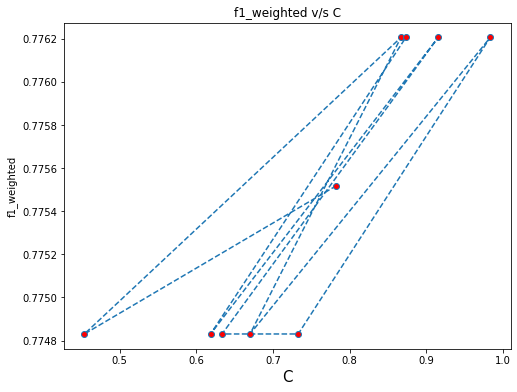

In [202]:
plt.figure(figsize=(8,6))
plt.xlabel("C",fontsize=15)
plt.ylabel("f1_weighted")
plt.title('f1_weighted v/s C')
plt.plot(df['param_C'],df['mean_test_score'],linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.show()

### Finding the accuracy in Test data using calculated optimal C

In [203]:
LR = LogisticRegression(penalty='l2',C=0.012211551668795173,solver='liblinear')
LR.fit(x_train_uni,Y_train)
y_pred = LR.predict(x_test_uni)

In [204]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))

Accuracy on test set: 86.832%
Precision on test set: 0.859
Recall on test set: 0.644
F1-Score on test set: 0.684


In [205]:
### Plotting Heatmap

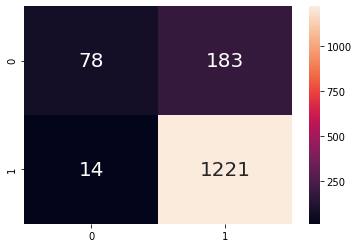

In [206]:
cnf = confusion_matrix(Y_test, y_pred)
sns.heatmap(cnf,annot=True,fmt='d',annot_kws={'size':20})

## TF-IDF

In [207]:
tf_idf_vect = TfidfVectorizer()
x_tr_tfidf = tf_idf_vect.fit_transform(X_train)
x_test_tfidf = tf_idf_vect.transform(X_test)

x_tr_tfidf = StandardScaler(with_mean = False).fit_transform(x_tr_tfidf)
x_test_tfidf = StandardScaler(with_mean = False).fit_transform(x_test_tfidf)

### Hyperparameter tuning using Grid Search CV to find the optimal C for Logistic Regression

In [208]:
LR = LogisticRegression(penalty ='l2',solver='liblinear')
C_values = [{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
gsv = GridSearchCV(LR,C_values,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(x_tr_tfidf,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_C=gsv.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.3s finished


Best HyperParameter:  {'C': 100}
0.8554024707080302


In [209]:
result = gsv.cv_results_
df = pd.DataFrame(result)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040596,0.011192,0.003803,0.000402,0.0001,{'C': 0.0001},0.772372,0.779202,0.775812,0.770350,0.780519,0.775651,0.003878,5
1,0.118308,0.012293,0.010654,0.007841,0.01,{'C': 0.01},0.841740,0.864959,0.832748,0.850273,0.834077,0.844760,0.011882,4
2,0.217413,0.025700,0.003797,0.000408,1,{'C': 1},0.846442,0.874685,0.842980,0.857334,0.845707,0.853430,0.011702,3
3,0.290619,0.022268,0.006992,0.007019,100,{'C': 100},0.845109,0.868840,0.845352,0.858257,0.859454,0.855402,0.009078,1
4,0.293313,0.027812,0.002601,0.002154,10000,{'C': 10000},0.845740,0.864551,0.849898,0.857630,0.858076,0.855179,0.006621,2


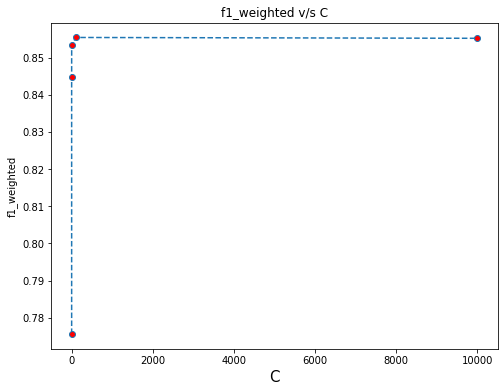

In [210]:
plt.figure(figsize=(8,6))
plt.xlabel("C",fontsize=15)
plt.ylabel("f1_weighted")
plt.title('f1_weighted v/s C')
plt.plot(df['param_C'],df['mean_test_score'],linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.show()

### Finding the accuracy in Test data using calculated optimal C

In [211]:
LR = LogisticRegression(penalty='l2',C=100,solver='liblinear')
LR.fit(x_tr_tfidf,Y_train)
y_pred = LR.predict(x_test_tfidf)

In [212]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))

Accuracy on test set: 85.963%
Precision on test set: 0.788
Recall on test set: 0.655
F1-Score on test set: 0.689


In [213]:
### Plotting Heatmap

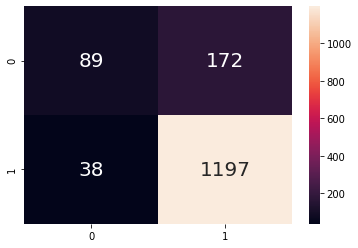

In [214]:
cnf = confusion_matrix(Y_test, y_pred)
sns.heatmap(cnf,annot=True,fmt='d',annot_kws={'size':20})

## RandomSearch CV

### Hyperparameter tuning using Random Search CV to find the optimal C for Logistic Regression

In [215]:
LR = LogisticRegression(penalty ='l2',solver='liblinear')
C_value = {'C':uniform()}
rsv = RandomizedSearchCV(LR, param_distributions = C_value , cv=5,verbose=1, scoring='f1_micro', n_jobs=-1)

In [216]:
rsv.fit(x_tr_tfidf,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000221A4C9B748>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1_micro', verbose=1)

In [218]:
print("Best HyperParameter: ",rsv.best_params_)
print(rsv.best_score_)
optimal_C=rsv.best_score_

Best HyperParameter:  {'C': 0.017555708077011567}
0.8790830945558741


In [219]:
result = rsv.cv_results_
df = pd.DataFrame(result)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.118673,0.016370,0.003605,0.000492,0.0175557,{'C': 0.017555708077011567},0.875358,0.889685,0.871060,0.885387,0.873926,0.879083,0.007169,1
1,0.187699,0.014410,0.003400,0.000486,0.446865,{'C': 0.4468651371578325},0.872493,0.893983,0.871060,0.882521,0.873926,0.878797,0.008577,3
2,0.182214,0.005827,0.003602,0.000488,0.568813,{'C': 0.5688131526089826},0.869628,0.893983,0.871060,0.882521,0.873926,0.878223,0.009061,9
3,0.207827,0.009521,0.008525,0.005965,0.904369,{'C': 0.9043688968278424},0.869628,0.893983,0.871060,0.882521,0.873926,0.878223,0.009061,9
4,0.167969,0.027275,0.009451,0.006353,0.342419,{'C': 0.3424187975183983},0.872493,0.893983,0.871060,0.882521,0.872493,0.878510,0.008757,7
5,0.121875,0.011692,0.003129,0.006258,0.0920985,{'C': 0.09209848318400471},0.873926,0.892550,0.871060,0.881089,0.875358,0.878797,0.007613,3
6,0.186974,0.018377,0.004996,0.006287,0.675527,{'C': 0.6755268594663467},0.871060,0.893983,0.871060,0.882521,0.873926,0.878510,0.008804,7
7,0.166264,0.016212,0.004404,0.001016,0.127826,{'C': 0.12782649321424022},0.872493,0.893983,0.872493,0.882521,0.873926,0.879083,0.008334,1
8,0.186517,0.009716,0.005198,0.006307,0.419761,{'C': 0.41976138900990023},0.872493,0.893983,0.871060,0.882521,0.873926,0.878797,0.008577,3
9,0.108272,0.032713,0.003940,0.006052,0.0880342,{'C': 0.08803424249763558},0.873926,0.892550,0.871060,0.881089,0.875358,0.878797,0.007613,3


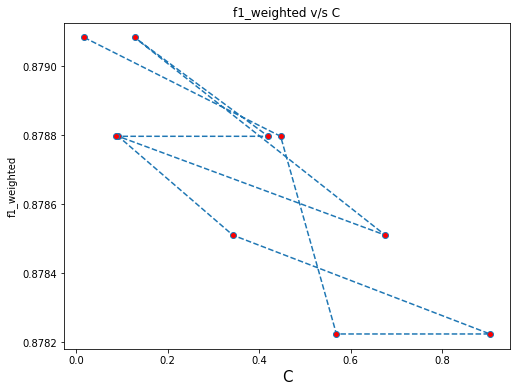

In [220]:
plt.figure(figsize=(8,6))
plt.xlabel("C",fontsize=15)
plt.ylabel("f1_weighted")
plt.title('f1_weighted v/s C')
plt.plot(df['param_C'],df['mean_test_score'],linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.show()

### Finding the accuracy in Test data using calculated optimal C

In [221]:
LR = LogisticRegression(penalty='l2',C=0.017555708077011567,solver='liblinear')
LR.fit(x_tr_tfidf,Y_train)
y_pred = LR.predict(x_test_tfidf)

In [222]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))

Accuracy on test set: 87.032%
Precision on test set: 0.869
Recall on test set: 0.646
F1-Score on test set: 0.688


### Plotting Heatmap

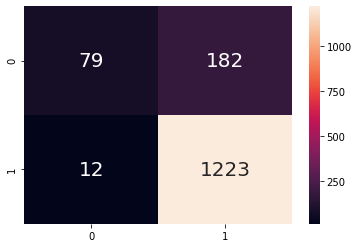

In [223]:
cnf = confusion_matrix(Y_test, y_pred)
sns.heatmap(cnf,annot=True,fmt='d',annot_kws={'size':20})

## Word2Vec

In [224]:
from gensim.models import Word2Vec

In [225]:
X_train

2503    love little white kernels popped corn good stu...
1258    love wild cherry tic tacs impossible find stor...
3945    bought day years found biscuits hard wheat glu...
1761    herb savor weeks waiting write review herbs we...
128     son acid reflux since birth every medication a...
                              ...                        
1120    excellent order nice able order omaha items am...
3400    pure breed gsd problems years upset stomach ea...
2273    amy brians coconut water yum vico plain tetra ...
1555    good variety flavors makes helpful sample choi...
3368    could not get work muffins decided try pancake...
Name: preprocessed reviews, Length: 3490, dtype: object

In [226]:
i=0
train_sent=[]
for sent in X_train:
    train_sent.append(sent.split())
i=0
test_sent=[]
for sent in X_test:
    test_sent.append(sent.split())

In [227]:
# For Train Set

In [228]:
w2v_model_train=Word2Vec(train_sent,min_count=5,size=50, workers=4)

In [229]:
w2v_words_train = list(w2v_model_train.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words_train))
print("sample words ", w2v_words_train[0:50])

number of words that occured minimum 5 times  3107
sample words  ['love', 'little', 'white', 'kernels', 'popped', 'corn', 'good', 'stuff', 'think', 'try', 'larger', 'kernel', 'pop', 'next', 'time', 'preference', 'wild', 'cherry', 'tic', 'tacs', 'impossible', 'find', 'stores', 'glad', 'get', 'amazon', 'price', 'excellent', 'great', 'low', 'calorie', 'treat', 'keep', 'buying', 'highly', 'recommend', 'purchase', 'bought', 'day', 'years', 'found', 'biscuits', 'hard', 'wheat', 'gluten', 'free', 'item', 'make', 'even', 'went']


In [230]:
len(train_sent)

3490

In [231]:
type(train_sent)

list

In [232]:
len(test_sent)

1496

## Avg Word2Vec

In [233]:
sent_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(train_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
            vec = w2v_model_train.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 3490/3490 [00:04<00:00, 750.38it/s]

3490
50


In [234]:
# For Test Set

In [235]:
w2v_model_test=Word2Vec(test_sent,min_count=5,size=50, workers=4)

In [236]:
w2v_words_test = list(w2v_model_test.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words_test))
print("sample words ", w2v_words_test[0:50])

number of words that occured minimum 5 times  1845
sample words  ['absolutely', 'treats', 'anything', 'one', 'get', 'away', 'go', 'anywhere', 'big', 'help', 'wonderful', 'treat', 'product', 'comes', 'natural', 'always', 'fresh', 'never', 'tasted', 'better', 'licorice', 'life', 'arrived', 'fast', 'box', 'price', 'great', 'purchase', 'another', 'case', 'good', 'tea', 'little', 'flavor', 'drinking', 'hot', 'cold', 'heard', 'mixed', 'reviews', 'feels', 'cheap', 'take', 'care', 'like', 'would', 'sounds', 'perfect', 'use', 'record']


In [237]:
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(test_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_test:
            vec = w2v_model_test.wv[word]
            sent_vec += vec
            cnt_words += 1
        else:
            pass
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 1496/1496 [00:01<00:00, 875.04it/s]

1496
50


### Finding the optimal C using GridSearchcv

In [238]:
LR = LogisticRegression(penalty ='l2',solver='liblinear')
C_values = [{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
gsv = GridSearchCV(LR,C_values,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(sent_vectors_train,Y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_C=gsv.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best HyperParameter:  {'C': 10000}
0.8121807401263379


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.6s finished


In [239]:
len(sent_vectors_train)

3490

In [240]:
len(Y_train)

3490

In [241]:
result = gsv.cv_results_
df = pd.DataFrame(result)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018100,0.003381,0.002602,0.001358,0.0001,{'C': 0.0001},0.772372,0.772372,0.772372,0.770350,0.770350,0.771563,0.000991,3
1,0.017800,0.005689,0.000999,0.001999,0.01,{'C': 0.01},0.772372,0.772372,0.772372,0.770350,0.770350,0.771563,0.000991,3
2,0.025001,0.007655,0.003126,0.006252,1,{'C': 1},0.772372,0.771660,0.770234,0.768212,0.768212,0.770138,0.001717,5
3,0.076212,0.008611,0.001652,0.001414,100,{'C': 100},0.772372,0.775812,0.769519,0.770350,0.771576,0.771926,0.002177,2
4,0.113277,0.023437,0.004326,0.005841,10000,{'C': 10000},0.813605,0.823668,0.804370,0.819319,0.799941,0.812181,0.008897,1


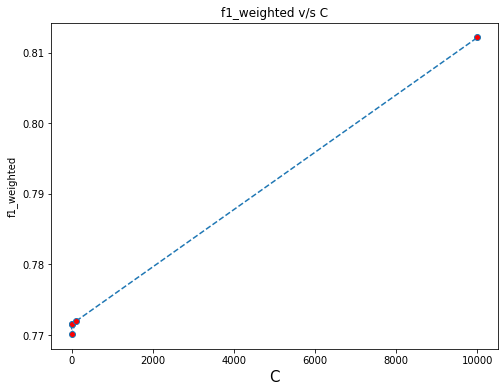

In [248]:
plt.figure(figsize=(8,6))
plt.xlabel("C",fontsize=15)
plt.ylabel("f1_weighted")
plt.title('f1_weighted v/s C')
plt.plot(df['param_C'],df['mean_test_score'],linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.show()

In [249]:
len(sent_vectors_test)

1496

In [250]:
len(sent_vectors_train)

3490

### Finding the accuracy in Test data using calculated optimal C

In [253]:
LR = LogisticRegression(penalty='l2',C=10000,solver='liblinear')
LR.fit(sent_vectors_train,Y_train)
y_pred = LR.predict(sent_vectors_test)

In [254]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))

Accuracy on test set: 17.714%
Precision on test set: 0.587
Recall on test set: 0.502
F1-Score on test set: 0.152


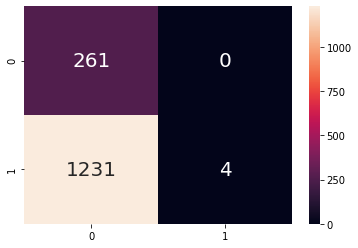

In [255]:
cnf = confusion_matrix(Y_test, y_pred)
sns.heatmap(cnf,annot=True,fmt='d',annot_kws={'size':20})

### Finding the optimal C using RandomSearchCv

In [257]:
LR = LogisticRegression()
C_value = {'C':uniform()}
rsv = RandomizedSearchCV(LR, param_distributions = C_value , cv=5,verbose=1, scoring='f1_micro', n_jobs=-1)

rsv.fit(sent_vectors_train,Y_train)

print("Best HyperParameter: ",rsv.best_params_)
print(rsv.best_score_)
optimal_C=rsv.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s


Best HyperParameter:  {'C': 0.04616733058150002}
0.8432664756446991


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.3s finished


In [258]:
result = rsv.cv_results_
df = pd.DataFrame(result)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051807,0.006852,0.002798,0.001720,0.849811,{'C': 0.8498111784689618},0.84384,0.842407,0.839542,0.838109,0.838109,0.840401,0.002328,5
1,0.029578,0.009553,0.002203,0.001836,0.0461673,{'C': 0.04616733058150002},0.84384,0.843840,0.843840,0.842407,0.842407,0.843266,0.000702,1
2,0.028128,0.005044,0.002422,0.001360,0.0590469,{'C': 0.059046895599854654},0.84384,0.843840,0.843840,0.842407,0.842407,0.843266,0.000702,1
3,0.027199,0.002993,0.003198,0.000750,0.191376,{'C': 0.1913757134591747},0.84384,0.842407,0.839542,0.838109,0.838109,0.840401,0.002328,5
4,0.024328,0.004595,0.002200,0.001326,0.0470363,{'C': 0.047036298765401274},0.84384,0.843840,0.843840,0.842407,0.842407,0.843266,0.000702,1
5,0.042492,0.016171,0.002200,0.001939,0.878019,{'C': 0.8780194325052656},0.84384,0.842407,0.839542,0.838109,0.838109,0.840401,0.002328,5
6,0.039634,0.005685,0.001599,0.001356,0.324621,{'C': 0.32462057529220134},0.84384,0.842407,0.839542,0.838109,0.838109,0.840401,0.002328,5
7,0.025001,0.007653,0.006246,0.007649,0.153433,{'C': 0.15343318713391563},0.84384,0.843840,0.839542,0.842407,0.838109,0.841547,0.002328,4
8,0.017303,0.003350,0.003527,0.006104,0.189384,{'C': 0.18938417270918306},0.84384,0.842407,0.839542,0.838109,0.838109,0.840401,0.002328,5
9,0.032350,0.003436,0.004326,0.005806,0.938621,{'C': 0.9386210526618939},0.84384,0.842407,0.839542,0.838109,0.838109,0.840401,0.002328,5


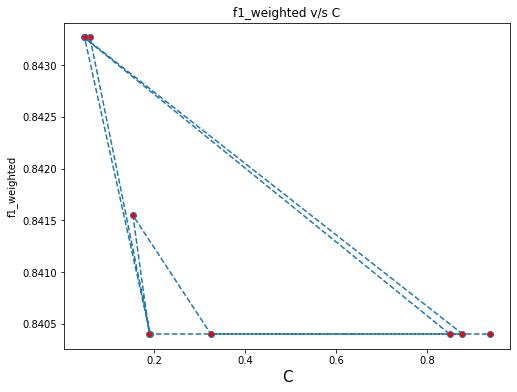

In [259]:
plt.figure(figsize=(8,6))
plt.xlabel("C",fontsize=15)
plt.ylabel("f1_weighted")
plt.title('f1_weighted v/s C')
plt.plot(df['param_C'],df['mean_test_score'],linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.show()

### Finding the accuracy in Test data using calculated optimal C

In [260]:
LR = LogisticRegression(penalty='l2',C=0.6801242601241545,solver='liblinear')
LR.fit(sent_vectors_train,Y_train)
y_pred = LR.predict(sent_vectors_test)

In [261]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred,average='macro')))

Accuracy on test set: 82.286%
Precision on test set: 0.413
Recall on test set: 0.498
F1-Score on test set: 0.451


In [262]:
# Ploting Heatmap

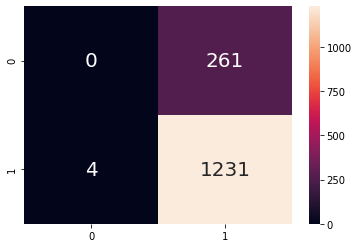

In [263]:
cnf = confusion_matrix(Y_test, y_pred)
sns.heatmap(cnf,annot=True,fmt='d',annot_kws={'size':20})

# Grid Search Summary

| Model | hyper parameter   |F1score test|accuracy Test
|------|------|------|------|
|  unigram  | 1| 0.708|86.76%|
| Bi-gram | 0.01|0.680| 86.76%|
|  Tf-IDF | 100| 0.689| 85.96%|
   | Av-Word2Vec | 10| 0.451| 82.28%|


# Random Search Summary

| Model | hyper parameter   |F1score test|accuracy Test
|------|------|------|------|
|  unigram  | 0.7432| 0.708|86.96%|
| Bi-gram | 0.8670|0.684| 86.83%|
|  Tf-IDF | 0.0175| 0.688| 87.03%|
| Av-Word2Vec | 0.1078| 0.452| 82.55%|